# K-Means (Overall Played by Session 1)

## Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Set working directory
month_file = '3_July'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

In [3]:
# Load original dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet')

print(dataset.columns)

Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
       'unique_machines', 'ave_time_

## Depletion Rate vs Total Gambles

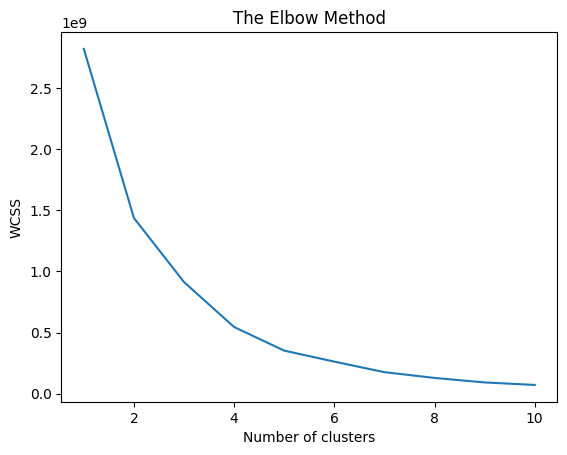

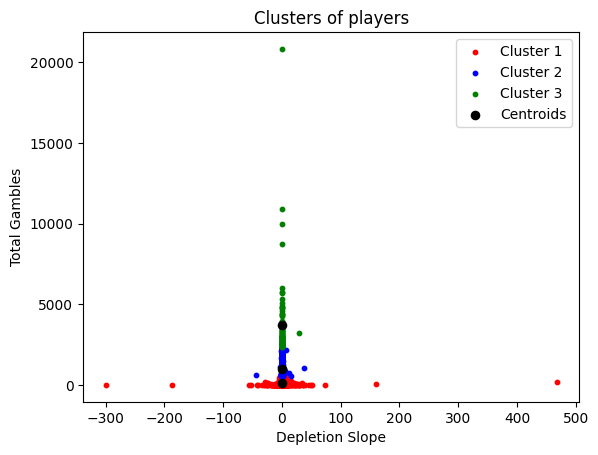

In [4]:
# Filter Columns
filter = ['session_time', 'playerkey', 'depletion_slope', 'total_gambles']

# Columns NOT INCLUDED
# 'playerkey', 'rank', 'age_range', '#W', '#L', '#NH', '#D', #2ws, #3ws, #4ws, 2ws_profit, 3ws_profit, 4ws_profit,
# 2ws_wgramt, 3ws_wgramt, 4ws_wgramt, ave_time_per_machine, 'total_duration', 'total_gambles'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel('Depletion Slope')
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

## Beginning_amt vs Total Gambles

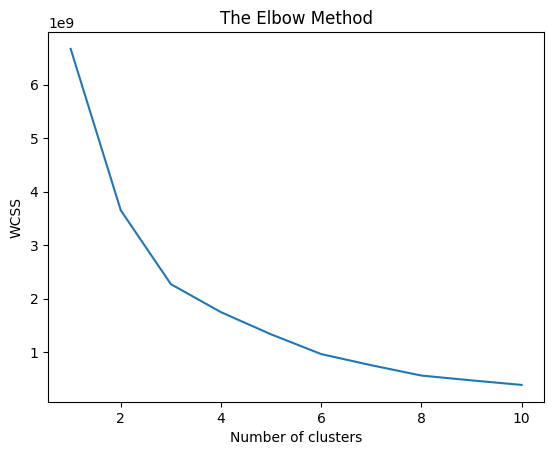

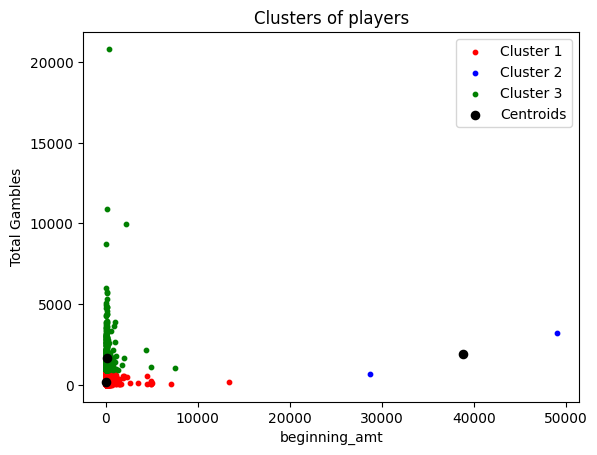

In [5]:
x_var = 'beginning_amt'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# 'beginning_amt', 'ending_amt', 'ending_balance'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()



## Theoritical Payback vs Total Gambles

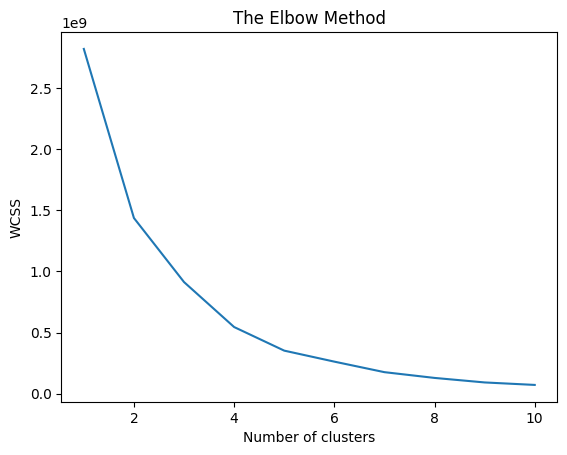

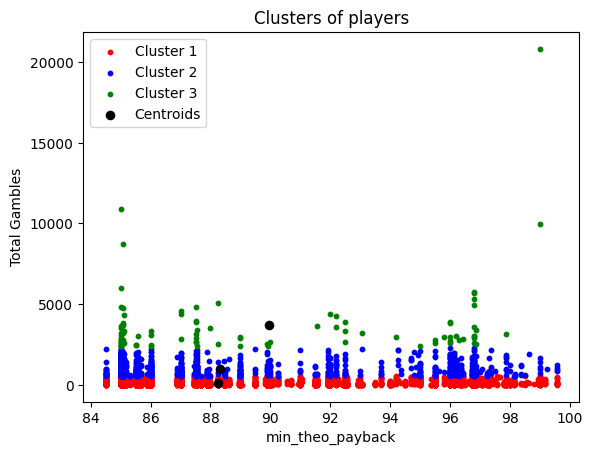

In [6]:
x_var =  'min_theo_payback'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# 'ave_theo_payback', 'min_theo_payback', 'max_theo_payback'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

## Wager Amount vs Total Gambles

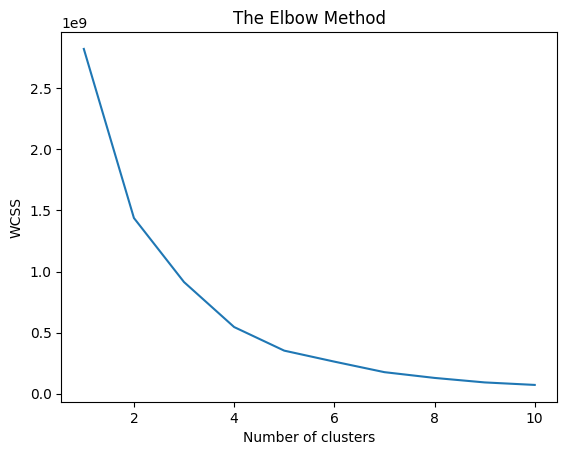

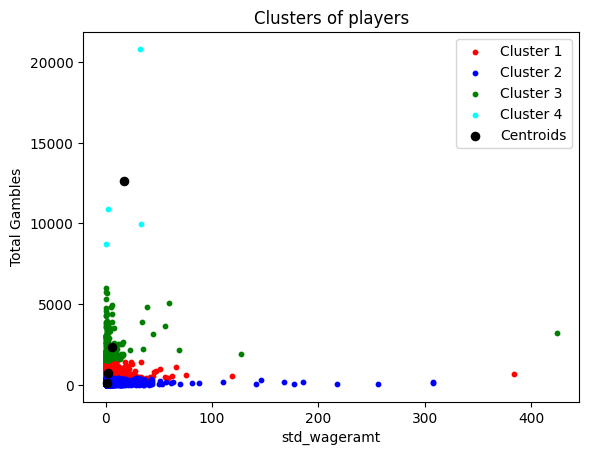

In [7]:
x_var = 'std_wageramt'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# 'ave_wageramt', 'std_wageramt', 'min_wager', 'max_wager', 'first_wager', 'last_wager'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

## P/B Ratio vs Total Gambles

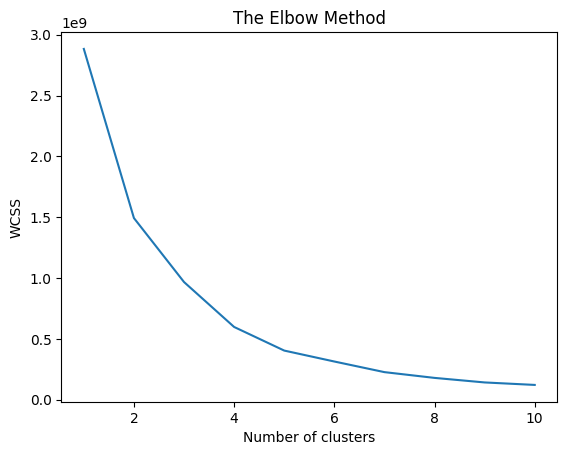

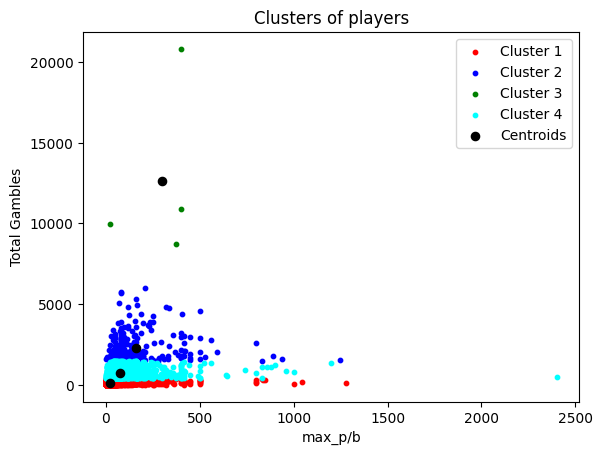

In [8]:
x_var = 'max_p/b'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'first_p/b', 'last_p/b'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

## '#inc_maxbet', '#dec_maxbet' vs Total Gambles

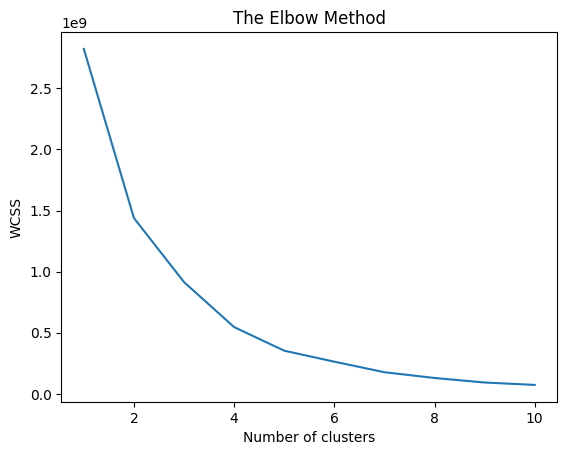

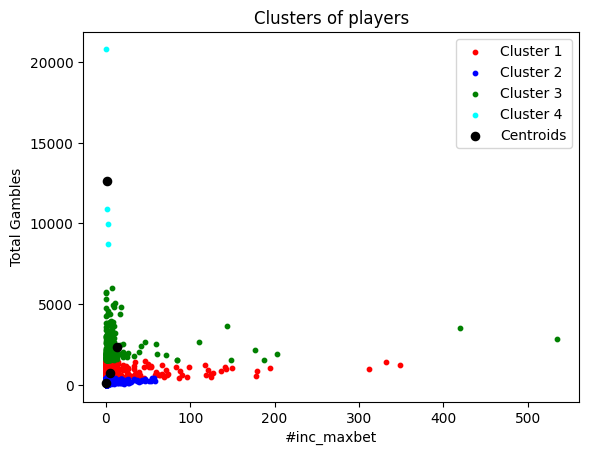

In [9]:
x_var = '#inc_maxbet'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# '#inc_maxbet', '#dec_maxbet'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
       'unique_machines', 'ave_time_per_machine', 'classification']

## Number of Ws, Ls, Ds, NHs vs Total Gambles

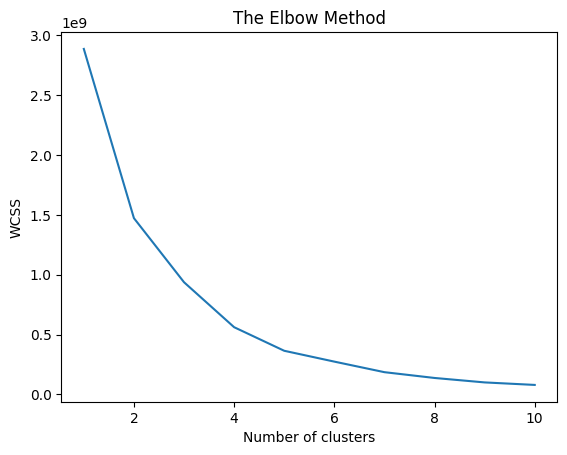

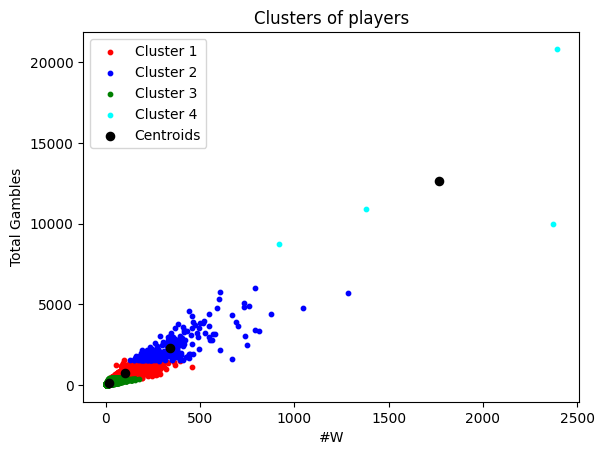

In [10]:
x_var = '#W'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g'.

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

## Win Streakes vs Total Gambles

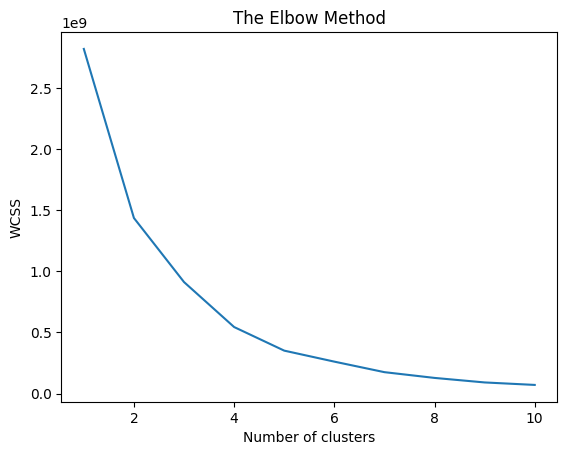

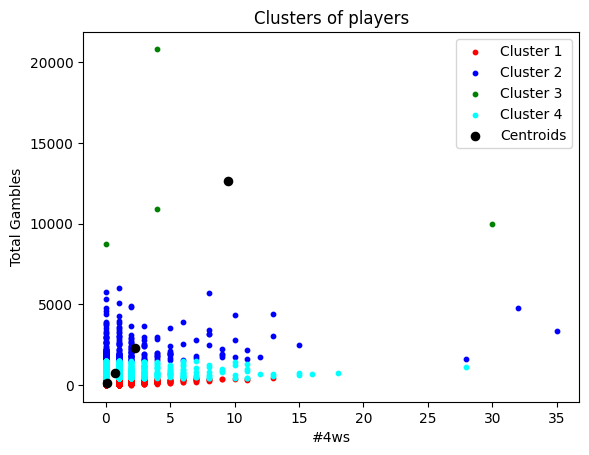

In [11]:
x_var = '#4ws'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
#        '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
#        '2ws/min', '3ws/min', '4ws/min'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()



## Gambling time vs Total Gambles

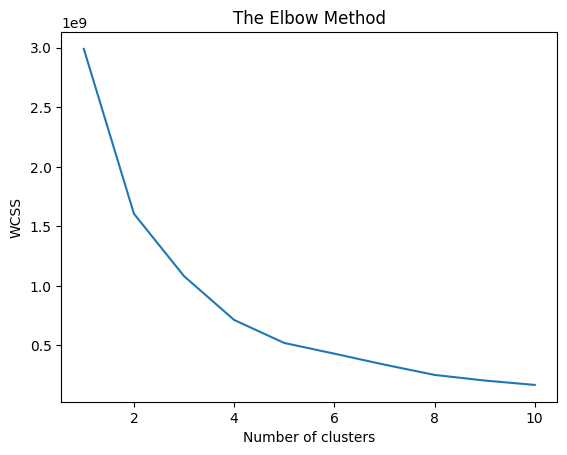

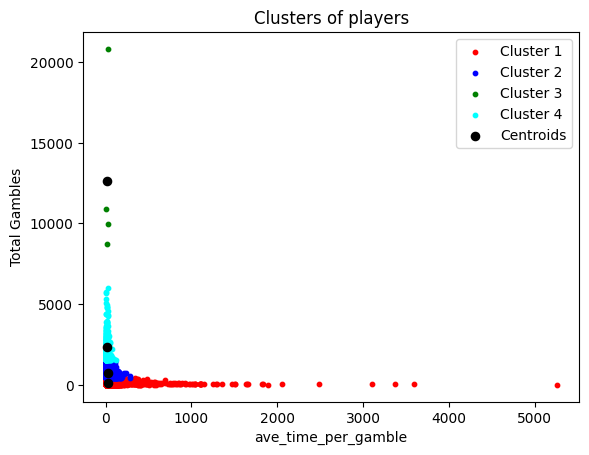

In [12]:
x_var = 'ave_time_per_gamble'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# 'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble'. 'total_duration'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

if x_var == 'total_duration':
        # Convert 'total_duration' to seconds
        dataset[x_var] = dataset[x_var].dt.total_seconds()


# Importing the dataset
X = dataset.iloc[:, [1, 2]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()

## Machine Behaviors vs Total Gambles

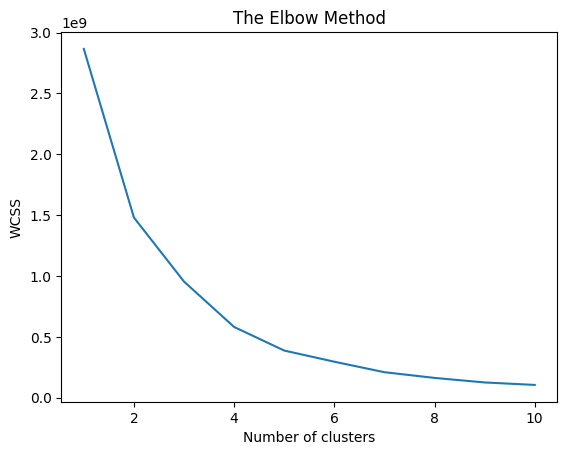

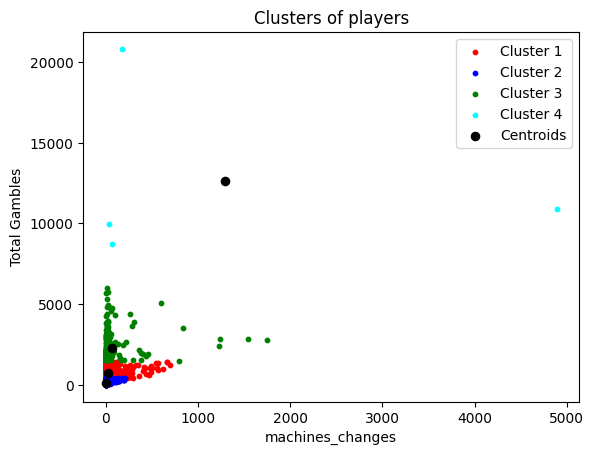

In [13]:
x_var = 'machines_changes'
# Filter Columns
filter = ['session_time', 'playerkey', x_var, 'total_gambles']

# Columns to be tested
# 'ave_time_per_machine', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom', 'unique_machines'

# Load dataset
dataset = pd.read_parquet('per_player_ending_balance_by_session_ALL.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

if x_var == 'ave_time_per_machine':
        # Convert 'total_duration' to seconds
        dataset[x_var] = dataset[x_var].dt.total_seconds()
        # Make all negative values positive
        dataset[x_var] = dataset[x_var].abs()

# Importing the dataset
X = dataset.iloc[:, [1, 2]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
        # print(i)
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
        kmeans.fit(X)
        # print(kmeans.inertia_)
        wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=10, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=35, c='black', label='Centroids')
plt.title('Clusters of players')
plt.xlabel(x_var)
plt.ylabel('Total Gambles')
plt.legend()
plt.show()